In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

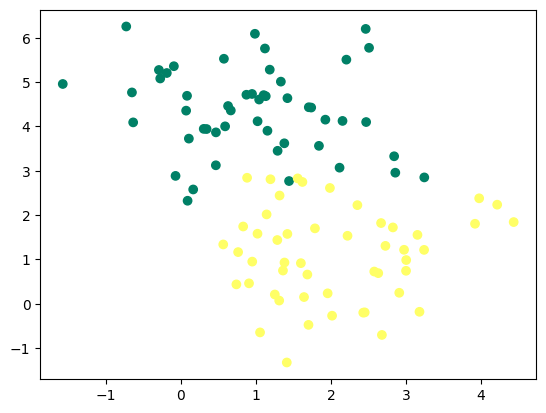

In [23]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 0)
plt.scatter(X[:,0],X[:,1], c= y, cmap = "summer")
plt.show()

In [16]:
def initialiser(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b
W, b = initialiser(X)
print(W.shape)
print(b)

(2, 1)
[-0.20324729]


In [17]:
def model(X, W, b):
    Z = X.dot(W)+b
    A = 1 / (1+np.exp(-Z))
    return A
A = model(X, W, b)
print(A.shape)

(100, 1)


In [18]:
def log_loss(A, y):
    return 1/len(y)*np.sum(-y*np.log(A) - (1-y)*np.log(1-A))
L = log_loss(A, y)
L

98.61232303965542

In [19]:
def gradients(X, A, y):
    dW = 1/len(y)*np.dot(X.T, (A-y))
    db = 1/len(y)*np.sum(A-y)
    return dW, db
dW, db = gradients(X,A, y)
print(dW.shape)
print(db)

(2, 100)
28.71920442623184


In [20]:
def predict(X, W, b):
    A = model(X ,W, b)
    return A >= 0.5

In [21]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return W, b
W, b = update(dW, db, W, b, 0.5)
print(dW.shape)
print(db)

(2, 100)
28.71920442623184


Performance = 89.0%


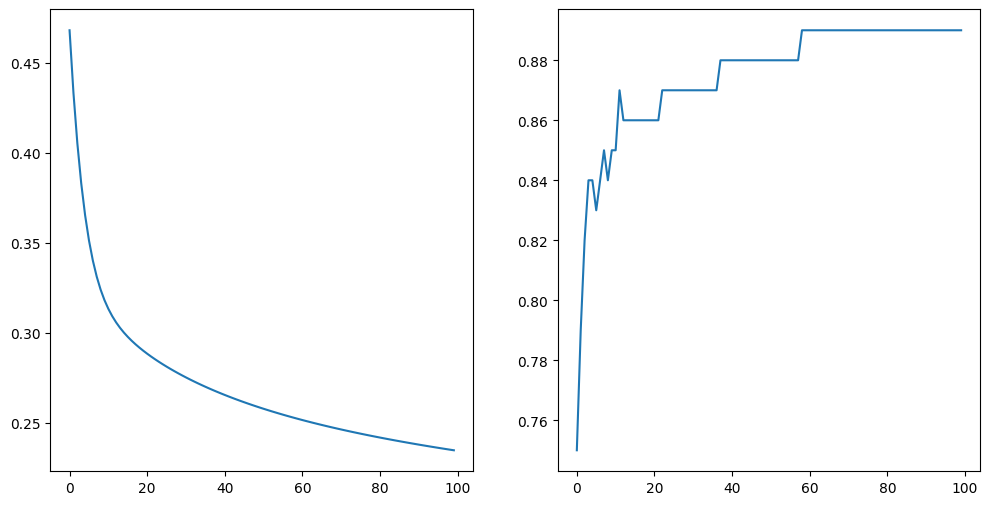

In [35]:
def neuron1(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialiser(X)
    L = []
    P = []
    binarizer = LabelBinarizer()
    y_bin = binarizer.fit_transform(y)
    for i in range(n_iter):
        A = model(X, W, b)
        L.append(log_loss(A, y_bin))
        dW, db = gradients(X, A, y_bin)
        W, b = update(dW, db, W, b, learning_rate)
        y_pred_bin = predict(X, W, b)
        y_pred = binarizer.inverse_transform(y_pred_bin)
        P.append(accuracy_score(y, y_pred))
    print(f"Performance = {accuracy_score(y, y_pred)*100}%")
    plt.figure(figsize = (12, 6))
    plt.subplot(1,2,1)
    plt.plot(L)
    plt.subplot(1,2,2)
    plt.plot(P, c = "orange")
    plt.show()
    return W, b
W, b = neuron1(X, y)